# Stage 5a: The Sun (Coronagraph)

A very important part of our Solar System is the Sun itself. It is for this reason that we, as its residents, have many observatories, both ground and space-based, that take measurements related to it and its influence.



1.   Installing the relevant modules
2.   Fetching Images from current spacecraft
3.   Plotting them
4.   Making a video in Python (intro)

## Installing the relevant modules

The first step here will be to get a module installed inside the jupyter notebook. To do that, just **run the following line the first time you open this notebook:**

In [1]:
!pip install -q sunpy[all] astropy  # This package is used for all things Sun-related, hosted in github: https://github.com/sunpy/sunpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.6/72.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.6/195.6 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**After the installation is finished, click on Runtime and Restart the Runtime with Control + M!**

In [1]:
from sunpy.net import Fido, attrs as a
from astropy import units as u
import warnings
warnings.simplefilter('ignore') # We will ignore warnings for now

from datetime import datetime   # Python's small Time module

Inst = 'LASCO'
Detect = 'C3' # Here we will use the LASCO coronalgraph
# It is onboard the SOHO mission.
#Provides us with images of the Sun almost 24-7!


# Now choose the period we would like to get our data from. Please don't do too much at once!

start_time = datetime(2012,8,31,18,0)  # Year,Month,Day,Hour,Minute
end_time = datetime(2012,8,31,23,59)

samplerate_hours = 6 * u.minute  # We need to give our images a cadence for collection.
# Please keep in mind that aia takes an image in all of its wavelengths every 10 seconds or so.
# Choose a cadence depending on what you want to bring out!


#fido = Fido.search(a.Time(start=start_time, end=end_time), a.Instrument(Inst), a.vso.Sample(samplerate_hours))

fido = Fido.search(a.Time(start=start_time, end=end_time), a.Instrument(Inst), a. Detector(Detect), a.Sample(samplerate_hours))

print(fido)

Results from 1 Provider:

30 Results from the VSOClient:
Source: http://vso.stanford.edu/cgi-bin/search
Total estimated size: 59.058 Mbyte

       Start Time               End Time        Source ... Extent Type   Size 
                                                       ...              Mibyte
----------------------- ----------------------- ------ ... ----------- -------
2012-08-31 18:06:06.000 2012-08-31 18:06:25.000   SOHO ...      CORONA 2.01074
2012-08-31 18:18:06.000 2012-08-31 18:18:25.000   SOHO ...      CORONA 2.01074
2012-08-31 18:30:05.000 2012-08-31 18:30:24.000   SOHO ...      CORONA 2.01074
2012-08-31 18:42:05.000 2012-08-31 18:42:24.000   SOHO ...      CORONA 2.01074
2012-08-31 18:54:05.000 2012-08-31 18:54:25.000   SOHO ...      CORONA 2.01074
2012-08-31 19:06:06.000 2012-08-31 19:06:25.000   SOHO ...      CORONA 2.01074
2012-08-31 19:18:05.000 2012-08-31 19:18:24.000   SOHO ...      CORONA 2.01074
2012-08-31 19:30:05.000 2012-08-31 19:30:24.000   SOHO ...      CORONA

Now, we should have a series of results showing above this text-box. These are available records that we may now download:

In [2]:
# # Download the data from the search results from online database
# from os import makedirs as newdir

# dir_images = 'LASCO_data'
# newdir(dir_images, exist_ok = True)

# Fido.fetch(fido, path = 'LASCO_data/')

Files Downloaded:   0%|          | 0/30 [00:00<?, ?file/s]

['LASCO_data/32310941.fts', 'LASCO_data/32310942.fts', 'LASCO_data/32310943.fts', 'LASCO_data/32310944.fts', 'LASCO_data/32310945.fts', 'LASCO_data/32310946.fts', 'LASCO_data/32310947.fts', 'LASCO_data/32310948.fts', 'LASCO_data/32310949.fts', 'LASCO_data/32310950.fts', 'LASCO_data/32310951.fts', 'LASCO_data/32310952.fts', 'LASCO_data/32310953.fts', 'LASCO_data/32310954.fts', 'LASCO_data/32310955.fts', 'LASCO_data/32310956.fts', 'LASCO_data/32310957.fts', 'LASCO_data/32310958.fts', 'LASCO_data/32310959.fts', 'LASCO_data/32310960.fts', 'LASCO_data/32310961.fts', 'LASCO_data/32310962.fts', 'LASCO_data/32310963.fts', 'LASCO_data/32310964.fts', 'LASCO_data/32310965.fts', 'LASCO_data/32310966.fts', 'LASCO_data/32310967.fts', 'LASCO_data/32310968.fts', 'LASCO_data/32310969.fts', 'LASCO_data/32310970.fts']

In [ ]:
# download data from pre-loaded github folder
from shutil import rmtree
from os import path

if path.exists('WEW2024_Database/'): # You wouldn't need these two lines if you're plotting a different date!
    rmtree(path.join('WEW2024_Database/'))
    
! git clone https://github.com/nawinnova/WEW2024_database.git # We're downloading data from github so it's quicker!

dir_images = 'WEW2024_Database/LASCO_data/'

##Looking at our newly acquired data

Now we need to access this data. For this we may use sunpy:

 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


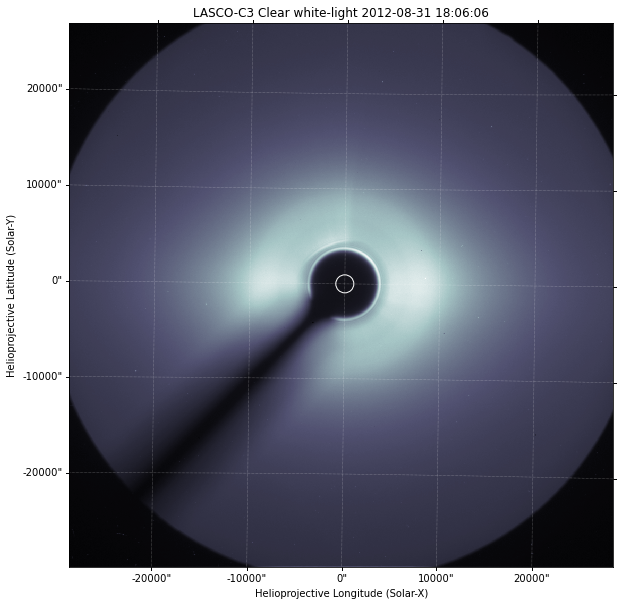

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import sunpy.map
import glob  # To fetch all files from a directory

map_list = sorted(glob.glob(dir_images+'*.fts'))

lasco_map = sunpy.map.Map(map_list[0])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=lasco_map)
lasco_map.plot(axes=ax, cmap = plt.get_cmap('soholasco3'))
lasco_map.draw_limb()
plt.show()

In [5]:
#get the time of the map
print(lasco_map.date)

2012-08-31T18:06:06.298


As we have just seen, it is fairly straightforward to get images from a spacecraft into Python and show them, but what can we do once we have these images?

## Making videos out of our material

A first good use of these images is to study the dynamics of the solar atmosphere, known to affect spacecraft and the Earth's weather! To do that, we need to have a look at all of the images in rapid succession.

In [6]:
!pip install -q opencv-python

Plot individual images

In [6]:
from os import makedirs as newdir
dir_png = 'My_pics_LASCO'
newdir(dir_png, exist_ok = True)

for index, picture in enumerate(map_list):
  lasco_map = sunpy.map.Map(picture)
  lasco_map.plot()
  plt.savefig(f'{dir_png}/{index:03d}.png', dpi=150)
  plt.clf()
  
  print(f'Saved figure {index}')

 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
Saved figure 0
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 1
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 2
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 3
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 4
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 5
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 6
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 7
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 8
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 9
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 10
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 11
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 12
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 13
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 14
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 15
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 16
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 17
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 18
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 19
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 20
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 21
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 22
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 23
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 24
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 25
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 26
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 27
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 28
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


 [astropy.io.fits.verify]
For frame 'heliographic_stonyhurst' the following metadata is missing: hgln_obs,dsun_obs,hglt_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,crlt_obs,dsun_obs
 [sunpy.map.mapbase]


Saved figure 29


<Figure size 432x288 with 0 Axes>

In [7]:
import cv2
img_array = []

for filename in sorted(glob.glob(f'{dir_png}/*.png')):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

out = cv2.VideoWriter('solar_vid_coronograph.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 5, size)

for i in range(len(img_array)):
    out.write(img_array[i])

out.release()

With the above, we will have created a movie called "solar_vid_coronograph.mp4", which holds all of our images together.

## Can you choose a time where you can see the CME bubble clearly? There are multiple correct answers!

In [ ]:
CMEtime = input('Enter the time of the CME in the format HH:MM:SS: ')
print('CME bubble appear at: ', CMEtime)